In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

C:\Users\user\AppData\Local\Temp\ipykernel_8956\1193979305.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('loan.csv')


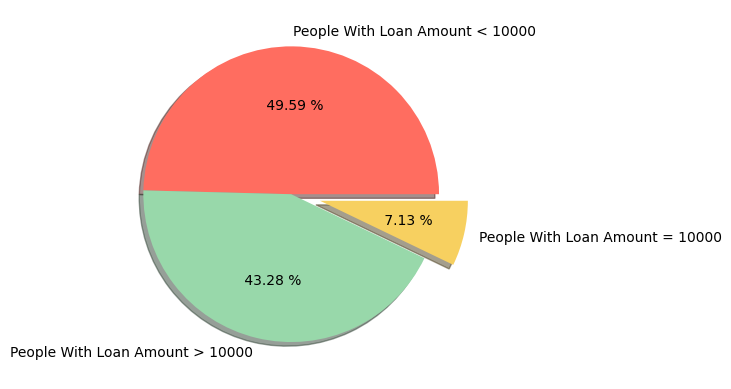

In [37]:

loans = pd.read_csv('loan.csv')

less = loans.loc[loans['loan_amnt']<10000].count()[0]
more = loans.loc[loans['loan_amnt']>10000].count()[0]
equal = loans.loc[loans['loan_amnt']==10000].count()[0]



colors = ['#FF6D60','#98D8AA','#F7D060']
labels = ['People With Loan Amount < 10000','People With Loan Amount > 10000','People With Loan Amount = 10000']
explode = [0,0,0.2]
plt.pie([less,more,equal],labels=labels,colors = colors, autopct =' %.2f %%', explode=explode, shadow = 'true')

plt.savefig('people vs amount.png',dpi=150)

plt.show()


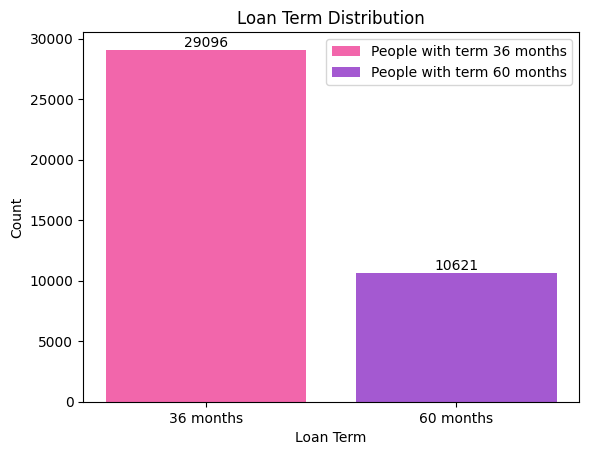

In [38]:
loan_terms = loans['term'].value_counts()
plt.style.use('default')

term_36 = loan_terms[' 36 months']
term_60 = loan_terms[' 60 months']


plt.bar(['36 months', '60 months'], [term_36, term_60], color=['#F266AB', '#A459D1'],label=['People with term 36 months','People with term 60 months'])

for i, count in enumerate([term_36,term_60]):
    plt.text(i, count,str(count), ha='center', va='bottom')
    
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term')
plt.ylabel('Count')    
plt.legend()
plt.savefig('people vs Term.png',dpi=150)
plt.show()


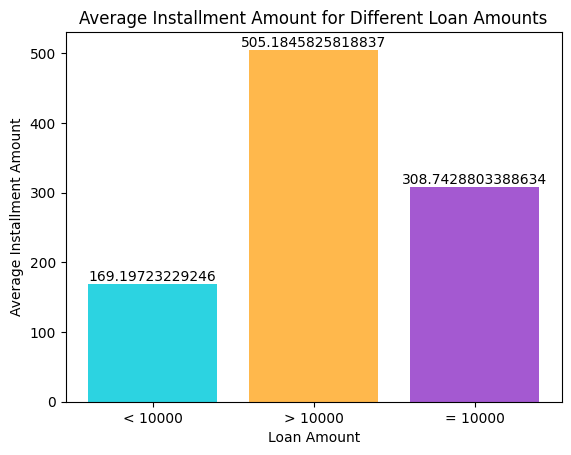

In [39]:
less = loans[loans['loan_amnt']<10000]
more = loans[loans['loan_amnt']>10000]
equal = loans[loans['loan_amnt']==10000]

avg_inst_less = less['installment'].mean()
avg_int_more = more['installment'].mean()
avg_int_equal = equal['installment'].mean()

colors = ['#2CD3E1','#FFB84C','#A459D1']
loan_amount = ['< 10000','> 10000','= 10000']
avg_installment = [avg_inst_less,avg_int_more,avg_int_equal]

plt.bar(loan_amount,avg_installment,color = colors)
plt.xlabel('Loan Amount')
plt.ylabel('Average Installment Amount')
plt.title('Average Installment Amount for Different Loan Amounts')


for i, count in enumerate([avg_inst_less,avg_int_more,avg_int_equal]):
    plt.text(i, count,str(count), ha='center', va='bottom')
    
plt.show()



total Amount of Loan: 445602650


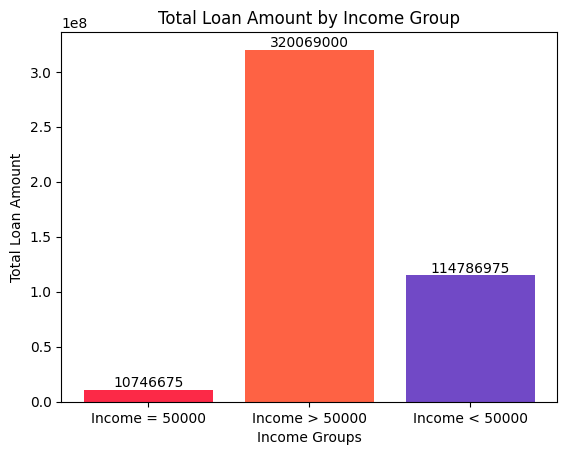

In [40]:
income_50000 = loans[loans['annual_inc'] == 50000]['loan_amnt'].sum()
income_greater_50000 = loans[loans['annual_inc'] > 50000]['loan_amnt'].sum()
income_less_50000 = loans[loans['annual_inc'] < 50000]['loan_amnt'].sum()
total_amnt = loans['loan_amnt'].sum()
print("total Amount of Loan:",total_amnt)


income_groups = ['Income = 50000', 'Income > 50000', 'Income < 50000']
loan_amounts = [income_50000, income_greater_50000, income_less_50000]
colors = ['#FC2947','#FE6244','#7149C6']
plt.bar(income_groups, loan_amounts, color = colors)
for i, count in enumerate([income_50000, income_greater_50000, income_less_50000]):
    plt.text(i, count,str(count), ha='center', va='bottom')
    
plt.xlabel('Income Groups')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Income Group')


plt.show()


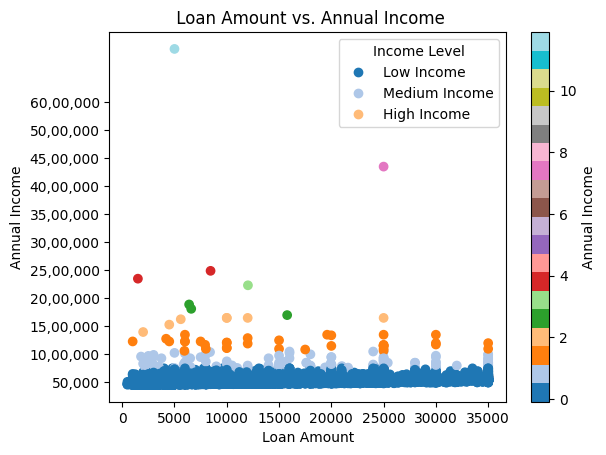

In [41]:
amount = loans['loan_amnt']
loans['annual_inc_new'] = (loans['annual_inc'] - 50000) / 500000

income = loans['annual_inc_new']

ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['50,000', '10,00,000', '15,00,000', '20,00,000', '25,00,000',
          '30,00,000', '35,00,000', '40,00,000', '45,00,000', '50,00,000', '60,00,000']
plt.yticks(ticks, labels)

plot = plt.scatter(amount,income,c=income,cmap="tab20")
cbar = plt.colorbar(plot)
cbar.set_label('Annual Income')

legend_labels = ['Low Income', 'Medium Income', 'High Income']
plt.legend(handles=plot.legend_elements()[0], labels=legend_labels, title='Income Level')

plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.title(' Loan Amount vs. Annual Income')

plt.show()

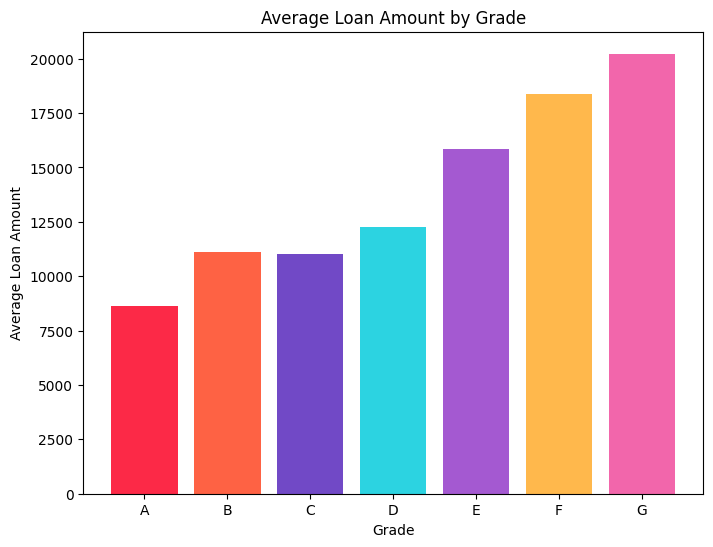

In [42]:
loan_grade_avg_amnt = loans.groupby('grade')['loan_amnt'].mean()

plt.figure(figsize=(8,6))


colors = ['#FC2947','#FE6244','#7149C6','#2CD3E1','#A459D1','#FFB84C','#F266AB']
plt.bar(loan_grade_avg_amnt.index,loan_grade_avg_amnt.values,color = colors)

plt.xlabel('Grade')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Grade')
plt.show()

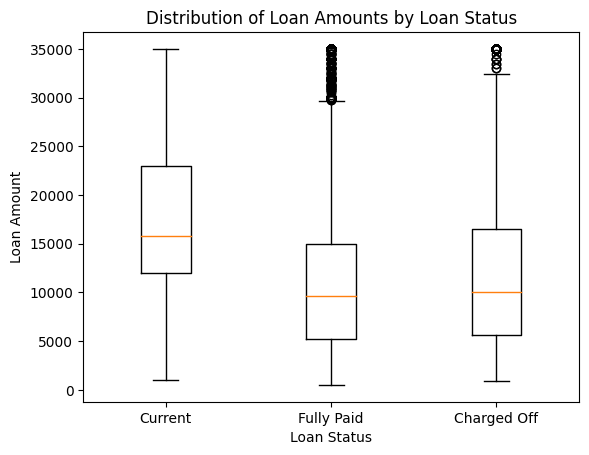

In [43]:
loan_status_cat = ['Current','Fully Paid','Charged Off']
loan_amnt = []

for status in loan_status_cat:
    filter_amnts = loans[loans['loan_status']==status]['loan_amnt']
    loan_amnt.append(filter_amnts)
    
plt.boxplot(loan_amnt, labels=loan_status_cat)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amounts by Loan Status')
plt.show()

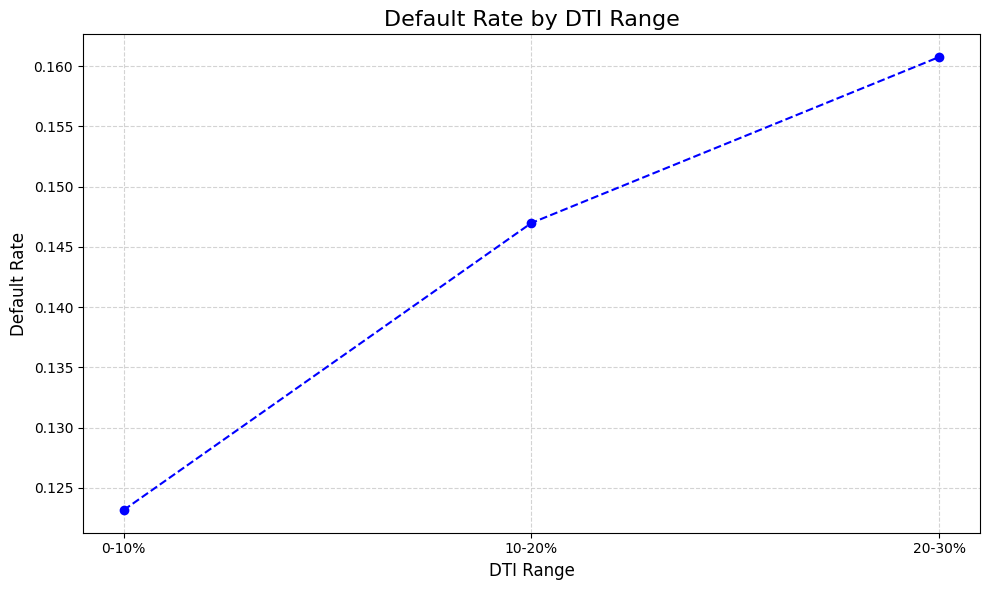

In [44]:

dti_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]

def get_dti_range(dti):
    for range_start, range_end in dti_ranges:
        if range_start <= dti < range_end:
            return f"{range_start}-{range_end}%"
    return f">{dti_ranges[-1][1]}%"

loans['dti_range'] = loans['dti'].apply(get_dti_range)
grouped_data = loans.groupby('dti_range')

plt.figure(figsize=(10, 6))

default_rates = grouped_data['loan_status'].apply(lambda x: (x == 'Charged Off').mean())



plt.plot(default_rates.index, default_rates.values, marker='o', linestyle='--', color='b')
plt.xlabel('DTI Range', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)
plt.title('Default Rate by DTI Range',fontsize=16)

plt.yticks(fontsize=10)
plt.xticks( fontsize=10)
plt.grid(color='lightgray', linestyle='--')

plt.tight_layout()
plt.show()





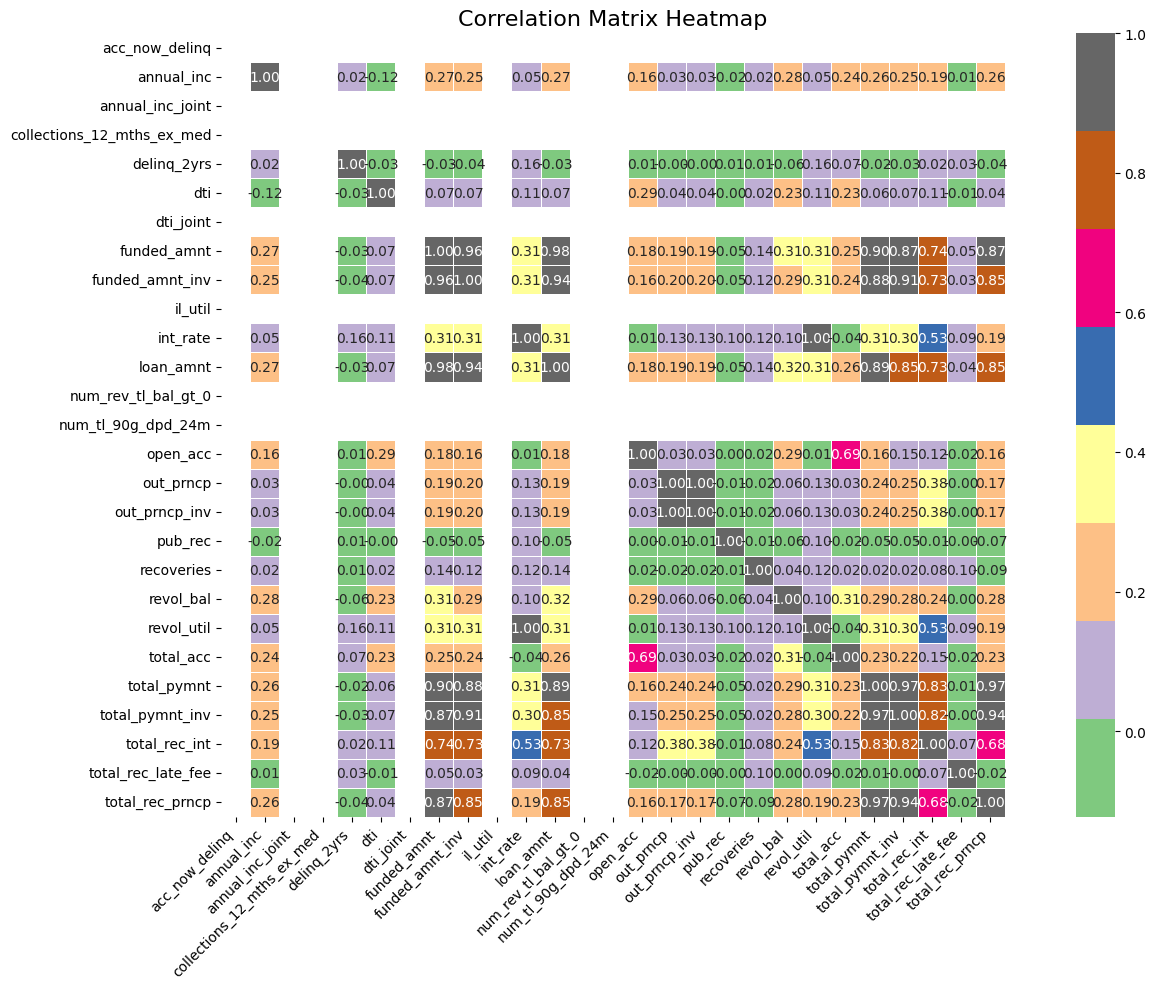

In [78]:
# List of numerical columns
relevant_columns = ['acc_now_delinq', 'annual_inc', 'annual_inc_joint', 'collections_12_mths_ex_med', 'delinq_2yrs',
                    'dti', 'dti_joint', 'funded_amnt', 'funded_amnt_inv',
                    'il_util', 'int_rate', 'loan_amnt', 'num_rev_tl_bal_gt_0', 'num_tl_90g_dpd_24m', 'open_acc',
                    'out_prncp', 'out_prncp_inv', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 'total_acc',
                    'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']



# Subset the dataframe with relevant columns
relevant_data = loans[relevant_columns]

# Create a correlation matrix
corr_matrix = relevant_data.corr()


# Create a heatmap using Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Accent', fmt=".2f", square=True, linewidths=0.5)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0,fontsize=10)

plt.tight_layout()
plt.show()